In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-prediction-simple-linear-regression/SalaryPrediction.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[10,5]

In [3]:
df=pd.read_csv('/kaggle/input/salary-prediction-simple-linear-regression/SalaryPrediction.csv')
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [4]:
df.shape

(40, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  40 non-null     float64
 1   Salary            40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 768.0 bytes


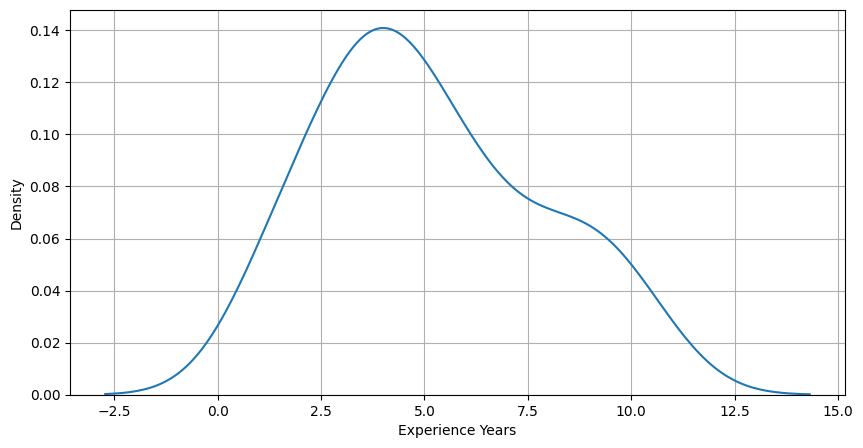

In [6]:
sns.kdeplot(df['Experience Years'])
plt.grid()
plt.show()

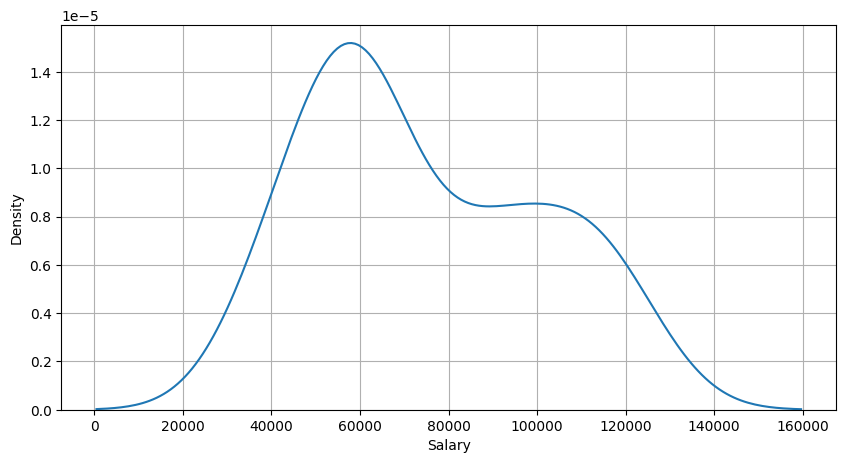

In [7]:
sns.kdeplot(df['Salary'])
plt.grid()
plt.show()

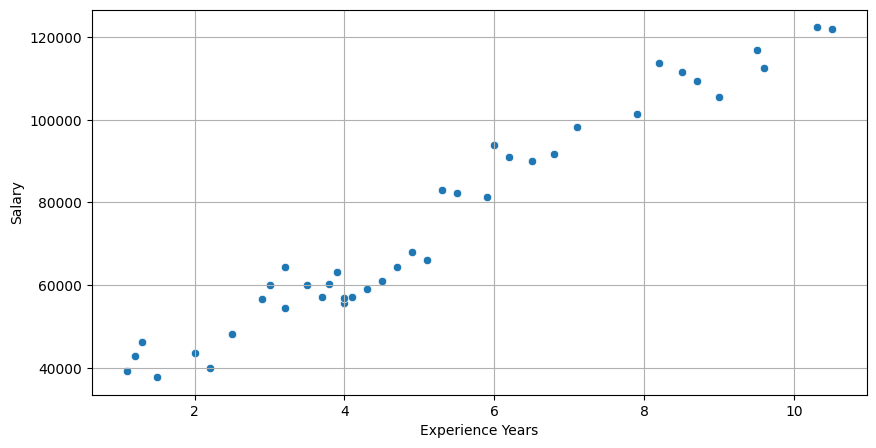

In [8]:
sns.scatterplot(x='Experience Years',y='Salary',data=df)
plt.grid()
plt.show()

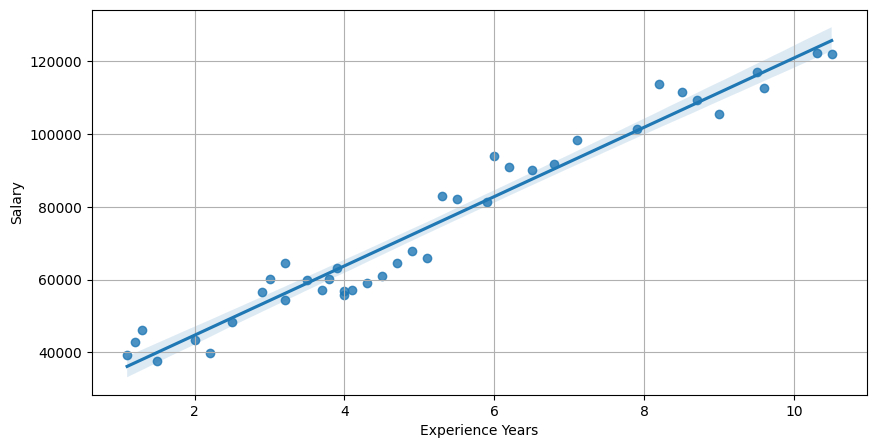

In [9]:
sns.regplot(x='Experience Years',y='Salary',data=df)
plt.grid()
plt.show()

In [10]:
x=df['Experience Years']
y=df['Salary']

In [11]:
import statsmodels.api as sm

In [12]:
xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     823.3
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           2.32e-27
Time:                        05:48:39   Log-Likelihood:                -400.39
No. Observations:                  40   AIC:                             804.8
Df Residuals:                      38   BIC:                             808.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.567e+04   1920.100  

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression


In [15]:
from sklearn.metrics import r2_score, mean_squared_error


In [16]:
lr=LinearRegression()

In [17]:
lr_model = lr.fit(xtrain.values.reshape(-1,1),ytrain)
lr_model

LinearRegression()

In [18]:
y_pred_train = lr_model.predict(xtrain.values.reshape(-1,1))
y_pred_test = lr_model.predict(xtest.values.reshape(-1,1))

In [19]:
print("The R2-Score is: ")
print(r2_score(ytrain,y_pred_train),r2_score(ytest,y_pred_test))
print("The MSE is : ")
print(np.sqrt(mean_squared_error(ytrain,y_pred_train)),np.sqrt(mean_squared_error(ytest,y_pred_test)))

The R2-Score is: 
0.9593243523024569 0.9439054952900567
The MSE is : 
5205.588208916534 5945.122385180168


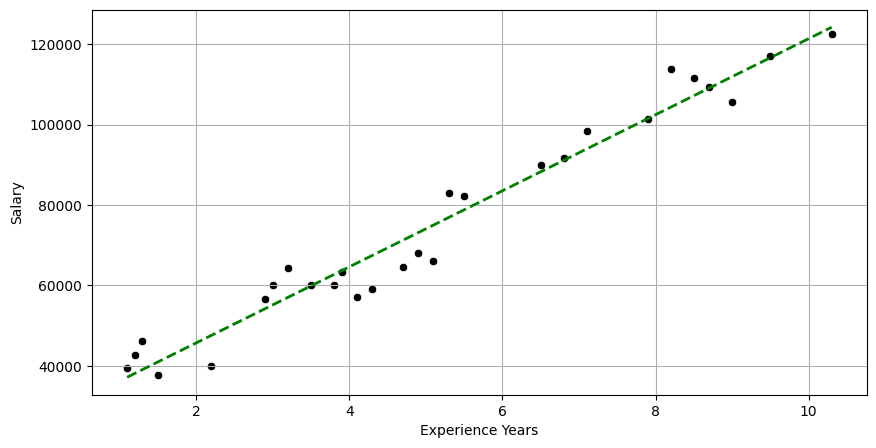

In [20]:
sns.scatterplot(x=xtrain,y=ytrain,color='k')
sns.lineplot(x=xtrain,y=y_pred_train,linewidth=2,linestyle='--',color='g')
plt.grid()
plt.show()

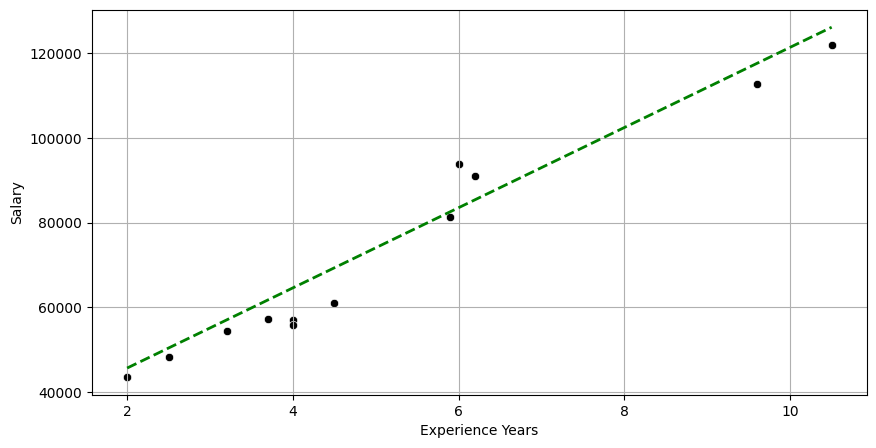

In [21]:
sns.scatterplot(x=xtest,y=ytest,color='k')
sns.lineplot(x=xtest,y=y_pred_test,linewidth=2,linestyle='--',color='g')
plt.grid()
plt.show()

In [22]:
print("If the candidate is experienced, then the salary will be {} times the experience".format(lr_model.coef_[0]))

print("--"*50)

print("If the candidate is fresher, i.e. 0 years of experience, the the salary will be {}".format(lr_model.intercept_))

If the candidate is experienced, then the salary will be 9459.359534830563 times the experience
----------------------------------------------------------------------------------------------------
If the candidate is fresher, i.e. 0 years of experience, the the salary will be 26767.86524944281


**This implies**

`Salary` = 26767.86524944281 + (9459.359534830563 * `Experience`)

In [23]:
def salary_predictor(x):
    salary = lr_model.predict([[x]])[0]
    return salary

In [24]:
# Illustration:

salary_predictor(4.5)

69334.98315618034